<a href="https://colab.research.google.com/github/codedyasai/Python_MachineLearning/blob/main/20_%EC%9D%8C%EC%95%85%EC%9D%B8%EB%A7%9E%EC%B6%94%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 음악취향 ​​및 자기보고 정신건강 설문조사 결과 데이터셋

- 알고 싶은 것은 '음악인' 여부
- https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results?select=mxmh_survey_results.csv


In [ ]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

# 데이터 로딩

In [ ]:
df = pd.read_csv('mxmh_survey_results.csv')
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


# 데이터 탐색과 전처리

In [ ]:
# 데이터 타입과 결측치 수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

- 결측값이 아주 많아보이지는 않는다.
- 우선 타겟 데이터가 결측인 행들을 지우자.


In [ ]:
df.dropna(subset= ['Instrumentalist'], inplace= True)

- Timestamp와 Permissions는 의미가 없어보이니 제거한다.

In [ ]:
# Timestamp와 Permissions 제거
df.drop(['Timestamp', 'Permissions'], axis= 1, inplace= True)

- 컬럼명에 들어간 특수문자들을 제거하자.

In [ ]:
df.columns = df.columns.str.replace(r'[\[\]\<]', '', regex=True)

In [ ]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,731.000000,732.000000,6.260000e+02,732.000000,732.000000,732.000000,732.000000
mean,25.248974,3.566325,1.597567e+06,5.839481,4.796448,3.732923,2.637978
std,12.072537,3.018778,3.996803e+07,2.796419,3.029759,3.089862,2.847603
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


- BPM에 이상한 값이 있어보이니 제거하자.
- 보통 BPM은 아무리 빨라도 300을 넘기진 않는다.
- 49 이하의 값들은 반대로 없을거라 판단되어 삭제

In [ ]:
df = df[(df['BPM'] >= 49) & (df['BPM'] <= 300)]

- BPM이 정규분포를 따르는지 보자.

In [ ]:
# 히스토그램을 이용한 BPM 분포 시각화
import plotly.express as px

fig = px.histogram(df, x='BPM', nbins=50, title='BPM Distribution')
fig.update_layout(
    xaxis_title='BPM',
    yaxis_title='Frequency',
)
fig.show()

In [ ]:
df['Primary streaming service'].value_counts()

Spotify                              396
YouTube Music                         74
I do not use a streaming service.     55
Apple Music                           43
Other streaming service               40
Pandora                                8
Name: Primary streaming service, dtype: int64

- 사용되는 음악 스트리밍 플랫폼은 Spotify의 비율이 압도적이다.

- 데이터 타입이 object인 컬럼들의 고유값들을 보자.

In [ ]:
# 데이터 타입이 "object"인 컬럼만 선택하고, 각 컬럼별로 고유한 값 확인
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    unique_values = df[column].unique()
    print(f'컬럼 "{column}"의 선택지들: {unique_values}')

컬럼 "Primary streaming service"의 선택지들: ['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]
컬럼 "While working"의 선택지들: ['Yes' 'No' nan]
컬럼 "Instrumentalist"의 선택지들: ['Yes' 'No']
컬럼 "Composer"의 선택지들: ['Yes' 'No']
컬럼 "Fav genre"의 선택지들: ['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'EDM' 'Country'
 'Hip hop' 'Rap' 'Pop' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']
컬럼 "Exploratory"의 선택지들: ['Yes' 'No']
컬럼 "Foreign languages"의 선택지들: ['Yes' 'No' nan]
컬럼 "Frequency Classical"의 선택지들: ['Rarely' 'Sometimes' 'Never' 'Very frequently']
컬럼 "Frequency Country"의 선택지들: ['Never' 'Sometimes' 'Very frequently' 'Rarely']
컬럼 "Frequency EDM"의 선택지들: ['Rarely' 'Never' 'Very frequently' 'Sometimes']
컬럼 "Frequency Folk"의 선택지들: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
컬럼 "Frequency Gospel"의 선택지들: ['Never' 'Sometimes' 'Rarely' 'Very frequently']
컬럼 "Frequency Hip hop"의 선택지들: ['Sometimes' 'Rarely' 'Never' 'Very frequently']
컬럼 "Frequenc

- Frequency들은 4개의 선택지로 나뉘어지는데, 정수로 점수화하자.

In [ ]:
freqs = [col for col in df.columns if 'Frequency' in col]
freqs

['Frequency Classical',
 'Frequency Country',
 'Frequency EDM',
 'Frequency Folk',
 'Frequency Gospel',
 'Frequency Hip hop',
 'Frequency Jazz',
 'Frequency K pop',
 'Frequency Latin',
 'Frequency Lofi',
 'Frequency Metal',
 'Frequency Pop',
 'Frequency R&B',
 'Frequency Rap',
 'Frequency Rock',
 'Frequency Video game music']

In [ ]:
# 함수를 정의하여 매핑 수행
def map_values(value):
    mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
    return mapping.get(value, value)

df[freqs] = df[freqs].applymap(map_values)

- "Music effects"의 선택지들: [nan 'No effect' 'Improve' 'Worsen']이니 이것도 서열척도로 바꾸어주자.

In [ ]:
# 매핑 딕셔너리 정의
mapping = {'No effect': 0, 'Improve': 1, 'Worsen': -1}

df['Music effects'] = df['Music effects'].map(mapping)

- 이제 Yes, No로 이루어진 컬럼들을 category로 바꿔주자.

In [ ]:
df[["Primary streaming service", "While working", "Instrumentalist", "Composer", "Fav genre", "Exploratory", "Foreign languages"]] = df[["Primary streaming service", "While working", "Instrumentalist", "Composer", "Fav genre", "Exploratory", "Foreign languages"]].astype('category')

- 타겟 컬럼인 Instrumentalist를 0과1로 바꿔주자

In [ ]:
# 'Yes'를 1로, 'No'를 0으로 매핑
df['Instrumentalist'] = df['Instrumentalist'].map({'Yes': 1, 'No': 0})

- 최종적인 df의 모습은 이것이다.

In [ ]:
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency Pop,Frequency R&B,Frequency Rap,Frequency Rock,Frequency Video game music,Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,1,Yes,Latin,Yes,Yes,156.0,...,3,2,3,0,2,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,0,No,Rock,Yes,No,119.0,...,2,2,1,3,1,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,0,No,Video game music,No,Yes,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,0.0
3,61.0,YouTube Music,2.5,Yes,0,Yes,Jazz,Yes,Yes,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,1.0
4,18.0,Spotify,4.0,Yes,0,No,R&B,Yes,No,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,1,No,Rock,Yes,Yes,120.0,...,3,0,1,3,0,7.0,6.0,0.0,9.0,1.0
732,18.0,Spotify,1.0,Yes,1,No,Pop,Yes,Yes,160.0,...,3,0,0,2,2,3.0,2.0,2.0,5.0,1.0
733,19.0,Other streaming service,6.0,Yes,0,Yes,Rap,Yes,No,120.0,...,2,2,2,1,1,2.0,2.0,2.0,2.0,1.0
734,19.0,Spotify,5.0,Yes,1,No,Classical,No,No,170.0,...,0,0,0,0,2,2.0,3.0,2.0,1.0,1.0


# 모델링

In [ ]:
x = df.loc[:, df.columns != 'Instrumentalist']
y = df['Instrumentalist']

In [ ]:
y.value_counts()

0    414
1    203
Name: Instrumentalist, dtype: int64

- 불균형하니 y로 stratify 해줘야 한다.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size= 0.2, stratify= y, random_state= 0)

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(enable_categorical=True, random_state= 96)
xgb_model.fit(x_train, y_train)
xgb_model_pred = xgb_model.predict(x_test)
xgb_model_pred_proba = xgb_model.predict_proba(x_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, precision_recall_curve

# get(실제값, 예측값, 예측확률)
def get(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    print('오차 행렬(혼돈 행렬)')
    print(confusion)

    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, F1:{f1:.4f}')

In [ ]:
get(y_test, xgb_model_pred)

오차 행렬(혼돈 행렬)
[[72 11]
 [21 20]]
정확도:0.7419, 정밀도:0.6452, 재현율:0.4878, F1:0.5556


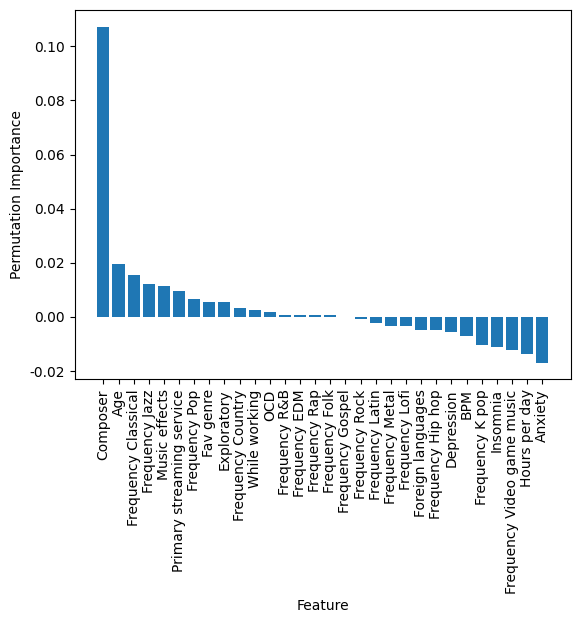

In [ ]:
from sklearn.inspection import permutation_importance

# permutation_importance 계산
result = permutation_importance(xgb_model, x_test, y_test, n_repeats=10, random_state=96)

# 중요도 점수 추출
importance = result.importances_mean
features = x_test.columns  # 피처 이름

# 중요도를 내림차순으로 정렬
sorted_idx = importance.argsort()[::-1]

# 막대 그래프로 중요도 표시
plt.bar(range(len(features)), importance[sorted_idx])
plt.xticks(range(len(features)), [features[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Permutation Importance")
plt.show()

- permutation importance값이 음수가 나온다는 것은<br>
permutation importance를 계산하기 위해 무작위로 섞은(shuffled) 데이터를 예측한 것이 <br>실제 데이터를 예측한 것보다 더 정확한 결과가 나왔다는 뜻이다.
<br>
- 음수가 나온 feature들은 예측에 기여를 하지 않는다는 것이다.(importance가 0에 가깝다)
- 이것은 작은 데이터셋에서 많이 일어나는 현상이다.

In [ ]:
xgb_model2 = xgb.XGBClassifier(
    learning_rate = 0.1,
    max_depth = 3,
    subsample= 0.8,
    n_estimators= 90,
    enable_categorical=True, random_state= 96)
xgb_model2.fit(x_train, y_train)


xgb_model2_pred = xgb_model2.predict(x_test)
xgb_model2_pred_proba = xgb_model2.predict_proba(x_test)[:, 1]

In [ ]:
get(y_test, xgb_model2_pred, xgb_model2_pred_proba)

오차 행렬(혼돈 행렬)
[[74  9]
 [20 21]]
정확도:0.7661, 정밀도:0.7000, 재현율:0.5122, F1:0.5915


- 아까보단 값이 조금 나아졌다. 하지만 여전히 좋지는 않다.
<br>
악기를 다루는 사람들을 이 데이터셋의 피처들만으로는 구분하기 어렵거나,
1. 데이터셋이 작은 것
2. 그로 인해 과적합을 해결하지 못한것 이 문제가 아닌가 싶다.

악기를 다루는 사람이냐 아니냐를 분류하는 것에 가장 큰 영향을 준 것은
1. 작곡가 여부
2. 나이
3. 클래식 음악을 듣는 빈도 였다.

하지만 셋 다 절대적으로 큰 영향력이 있다고는 볼 수 없었다.